___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

# import warnings
# warnings.filterwarnings("ignore")
# warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

np.set_printoptions(suppress=True)

In [2]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [4]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [6]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [14]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")   

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [15]:
# Checking the shape of one image
X_train[1].shape

# 28x28 tek kanalli resim

(28, 28)

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [22]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [23]:
len(classes)

10

Text(0.5, 1.0, '9')

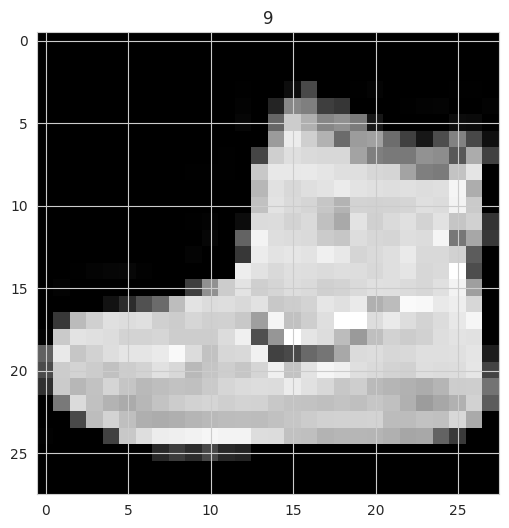

In [12]:
plt.imshow(X_train[0], cmap = 'gray')
plt.title(y_train[0])

<ipython-input-13-07b25e0bbab6>:15: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


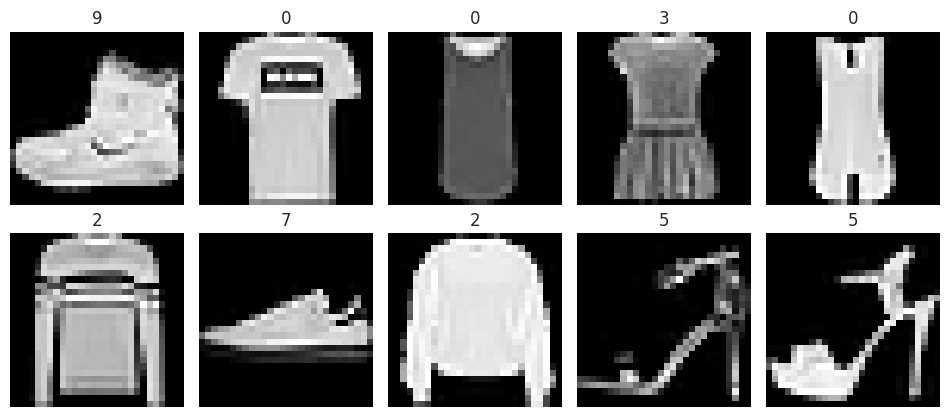

In [13]:
num_rows, num_cols = 2, 5
f, ax = plt.subplots(2, 5, figsize=(12,5),
                     gridspec_kw={'wspace':0.09, 'hspace':0.1}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].set_title( y_train[image_index])
        ax[r,c].imshow( X_train[image_index], cmap='gray')
       
        
plt.tight_layout()
plt.show()
plt.close()

Text(0.5, 1.0, '9')

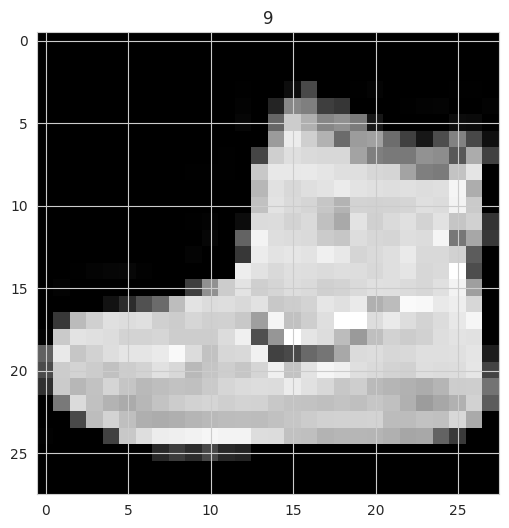

In [16]:
plt.imshow(X_train[0], cmap = 'gray')
plt.title(y_train[0])

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [9]:
X_train[0].min(), X_train[0].max()

(0, 255)

In [10]:
# Normalize image pixels

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [11]:
X_train[0].min(), X_train[0].max()

(0.0, 1.0)

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [17]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [18]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# kanal sayisini ekliyoruz

In [19]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [20]:
from tensorflow.keras.utils import to_categorical

In [24]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_train.shape

(60000, 10)

In [25]:
y_train[0], Y_train[0]

(9, array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32))

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [28]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu')) # stride = 1, padding = valid 

                # 32 filtre olsun bunlar 3*3'lük filtreler olsun -------> filter_size = kernel_size
                # input_shape=(28, 28, 1) yine burada belirtebiliyoruz.

model.add(MaxPool2D(pool_size=(2, 2))) # stride = pool size, padding = valid

model.add(Flatten()) # flatten ile vektörel hale getirip ann yapısına geçiyoruz.

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [29]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 28)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 4732)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               605824    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 607,394
Trainable params: 607,394
Non-trainable params: 0
________________________________________________

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [31]:
from tensorflow.keras.callbacks import EarlyStopping

In [32]:
early_stop = EarlyStopping(monitor='val_accuracy',mode="max", patience=4, restore_best_weights = True)

In [33]:
model.fit(X_train, Y_train, batch_size=32, epochs=20, validation_data=(X_test,Y_test),callbacks=[early_stop]) 

Epoch 1/20
1875/1875 [==============================] - 20s 4ms/step - loss: 0.4056 - accuracy: 0.8564 - val_loss: 0.3152 - val_accuracy: 0.8880
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2712 - accuracy: 0.9020 - val_loss: 0.2847 - val_accuracy: 0.8964
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2299 - accuracy: 0.9162 - val_loss: 0.2840 - val_accuracy: 0.8969
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2025 - accuracy: 0.9262 - val_loss: 0.2664 - val_accuracy: 0.9063
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1799 - accuracy: 0.9348 - val_loss: 0.3018 - val_accuracy: 0.8984
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1633 - accuracy: 0.9401 - val_loss: 0.2679 - val_accuracy: 0.9126
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1469 - accuracy: 0.9473 - val_loss: 0.3104 - val_accuracy

**TASK 7: Plot values of metrics you used in your model.**

In [34]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.406,0.856,0.315,0.888
1,0.271,0.902,0.285,0.896
2,0.230,0.916,0.284,0.897
3,0.203,0.926,0.266,0.906
4,0.180,0.935,0.302,0.898


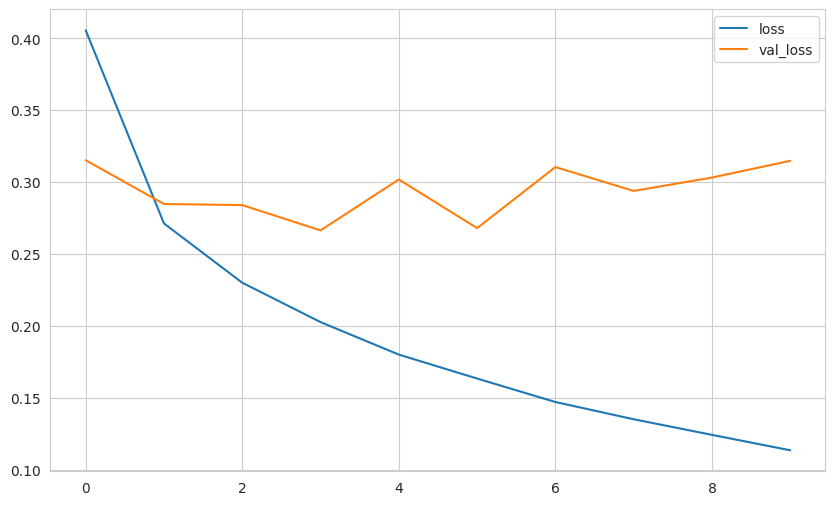

In [35]:
summary[["loss", "val_loss"]].plot();

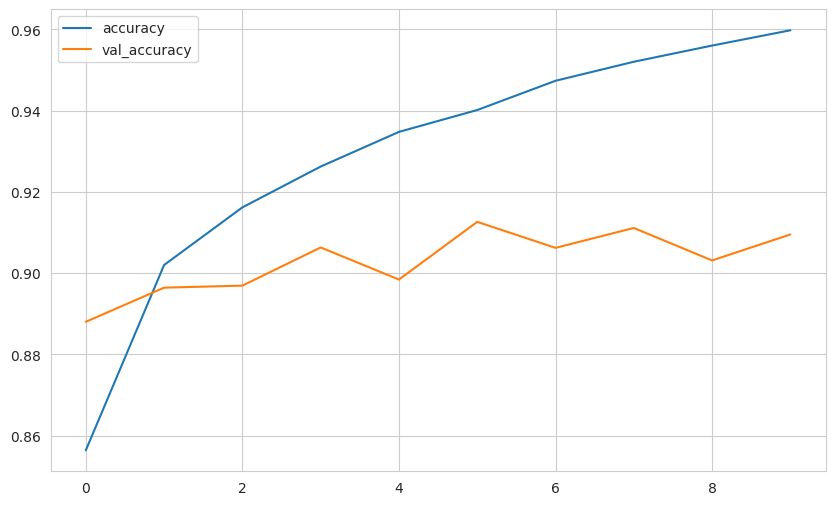

In [36]:
summary[["accuracy", "val_accuracy"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [37]:
from sklearn.metrics import classification_report, confusion_matrix,multilabel_confusion_matrix

In [38]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2679 - accuracy: 0.9126


[0.26793980598449707, 0.9125999808311462]

In [39]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.26793980598449707
Test accuracy: 0.9125999808311462


In [40]:
pred_prob = model.predict(X_test)
pred_prob

313/313 [==============================] - 1s 2ms/step


array([[0.00000001, 0.        , 0.00000024, ..., 0.00026882, 0.0000004 ,
        0.9993723 ],
       [0.00004709, 0.        , 0.9999484 , ..., 0.        , 0.        ,
        0.        ],
       [0.00000002, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.00000001, 0.99999166,
        0.        ],
       [0.00000003, 0.9999999 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00007189, 0.00000378, 0.00312597, ..., 0.04242161, 0.00078318,
        0.00082437]], dtype=float32)

In [41]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1000
           1       1.00      0.98      0.99      1000
           2       0.86      0.85      0.86      1000
           3       0.91      0.92      0.92      1000
           4       0.88      0.83      0.85      1000
           5       0.98      0.99      0.98      1000
           6       0.75      0.73      0.74      1000
           7       0.96      0.97      0.97      1000
           8       0.99      0.98      0.98      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [43]:
print(confusion_matrix(y_test, y_pred))

[[913   0  15  15   3   2  48   0   4   0]
 [  1 976   1  14   2   0   5   0   1   0]
 [ 27   0 854   8  47   0  64   0   0   0]
 [ 16   3  13 917  28   0  23   0   0   0]
 [  1   1  57  19 827   1  94   0   0   0]
 [  0   0   0   0   0 989   0   9   0   2]
 [153   0  49  25  33   0 734   0   6   0]
 [  0   0   0   0   0  11   0 971   0  18]
 [  3   0   3   5   1   2   5   1 980   0]
 [  0   0   0   0   0   8   1  26   0 965]]


<Axes: >

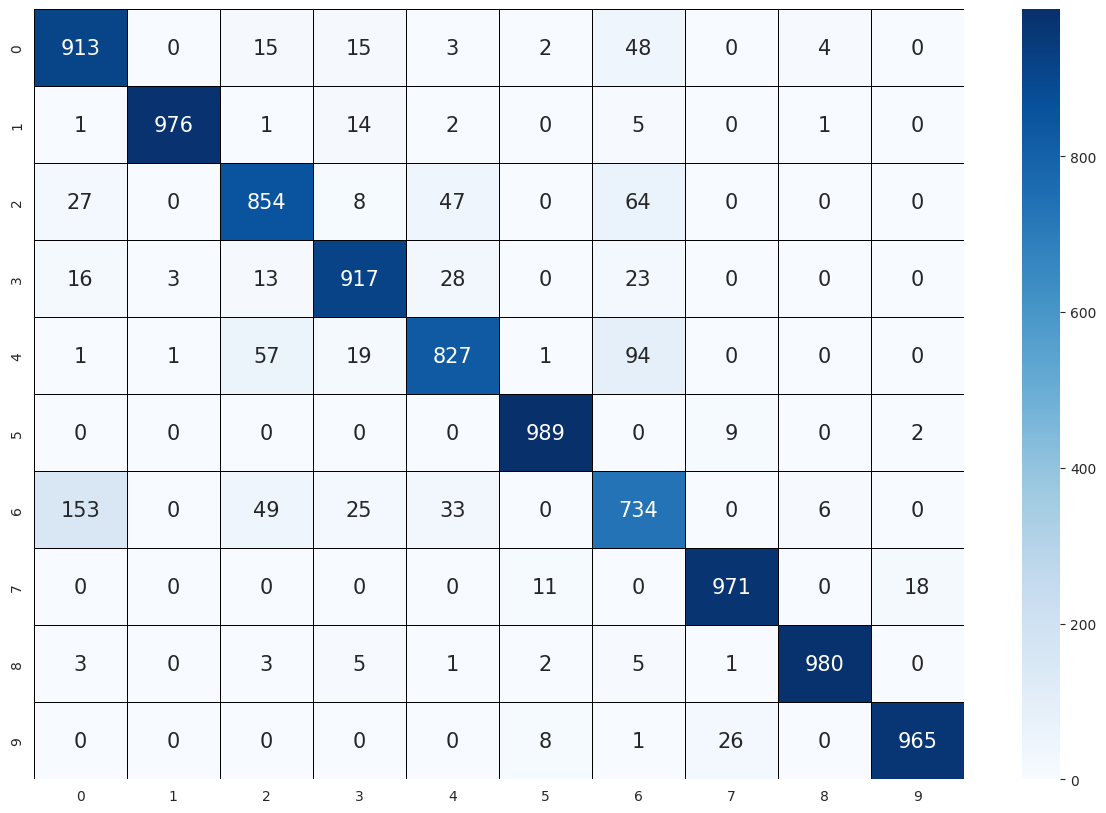

In [44]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 15})

In [45]:
np.not_equal(y_test, y_pred).sum()
# toplam hatalı değer

874

In [46]:
np.equal(y_test, y_pred).sum()
# toplam dogru tahmin degeri

9126

## Prediction

In [54]:
my_example = X_test[4]

In [55]:
my_example.shape

(28, 28, 1)

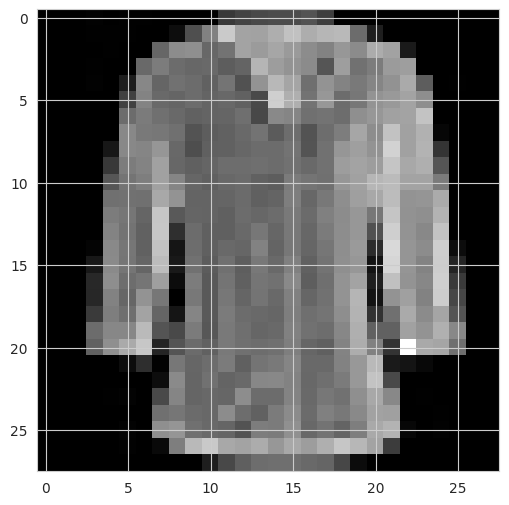

In [56]:
plt.imshow(my_example, cmap="gray")
plt.show()

In [57]:
pred_prob = model.predict(my_example.reshape(1,28,28,1)) # tek bir resim olduğunu söylüyoruz.
pred_prob

1/1 [==============================] - 0s 34ms/step


array([[0.07970808, 0.        , 0.0026016 , 0.0000021 , 0.00051223,
        0.        , 0.91717577, 0.        , 0.        , 0.00000027]],
      dtype=float32)

In [58]:
y_pred = np.argmax(pred_prob)
y_pred

6

In [60]:
y_test[4]

6

In [52]:
model.save("cnn-fashion.h5")

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___